In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate
import matplotlib as mpl
import math
import pandas as pd
#%matplotlib notebook

In [2]:
mpl.rcParams['xtick.major.pad'] = 8
mpl.rcParams['ytick.major.pad'] = 8

plt.rcParams.update({'font.size': 24})
plt.rcParams.update({'xtick.major.pad':20})
plt.rcParams.update({'ytick.major.pad':20})

In [3]:
colours = {32:'C0', 64:'C1', 128:'C2', 256:'C3', 512:'C4', 0:'C5', 16:'C6', 4:'C0', 8:'C1'}

In [4]:
t_crit = 2.26918 # critical temperature for ising model
t_crit_xy = 0.887

q = 3
t_crit_potts3 = 1 / math.log(1+math.sqrt(q))
q = 4
t_crit_potts4 = 1 / math.log(1+math.sqrt(q))

In [5]:
L = 64

In [6]:
path = 'data2d\\'
path_pics = 'pics\\'

# Average acceptance ratios of  the Metropolis updates for two-dimensional models: 
## the Ising model (circles), the Potts model with q = 3 (triangles) and q = 4 (diamonds) and the XY model (squares). 
Symbols are simulation results with erorrbars, lines are to guide an eye. Semitransparent disks show critical points. Simulations were done with $64^2$ spins with periodic boundary conditions in both directions. See text for discussion.

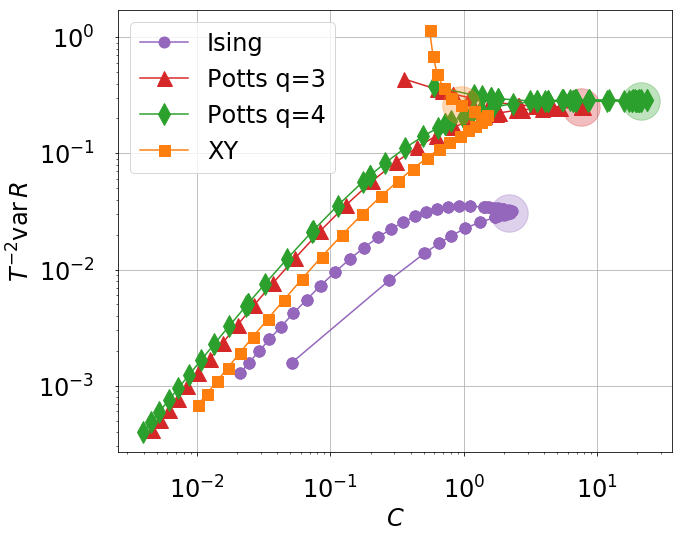

In [8]:
fig, ax = plt.subplots(figsize=(10,8))
ms = 15
ms2 = 11 

filename = 'metropolis T, E, C, R disp std L = {0} sweeps term.csv'.format(L)
arr = np.loadtxt(path+filename)
arr = arr[np.argsort(arr[:,0])][3:]
ax.loglog(arr[:,2]/L**2*arr[:,0]**0, arr[:,3]*(1-arr[:,3])/arr[:,0]**2,  'o-', label='Ising', color=colours[512], ms=ms2)

crit = np.argwhere(abs(arr[:,0] - t_crit)<1e-4)[0][0]
ax.loglog((arr[crit,2]/L**2*arr[crit, 0]**0), (arr[crit,3]*(1-arr[crit, 3])/arr[crit, 0]**2), '.',ms=75, alpha=0.3, color=colours[512])     

filename = 'potts 3 metropolis T, E, C, R disp std L={0} sweeps term.csv'.format(L)
arr = np.loadtxt(path+filename)
arr = arr[np.argsort(arr[:,0])]
ax.loglog((arr[1:,2]/L**2*arr[1:,0]**0), (arr[1:,3]*(1-arr[1:,3])/arr[1:,0]**2),  '^-', label='Potts q=3', color=colours[256], ms=ms)    
crit = np.argwhere(abs(arr[:,0] - t_crit_potts3)<1e-4)[0][0]
ax.loglog((arr[crit,2]/L**2*arr[crit, 0]**0), (arr[crit,3]*(1-arr[crit, 3])/arr[crit, 0]**2), '.',ms=75, alpha=0.3, color=colours[256])  

filename = 'potts 4 metropolis T, E, C, R disp std L={0} sweeps term.csv'.format(L)
arr = np.loadtxt(path+filename)
arr = arr[np.argsort(arr[:,0])]
ax.loglog((arr[1:,2]/L**2*arr[1:,0]**0),( arr[1:,3]*(1-arr[1:,3])/arr[1:,0]**2),  'd-', label='Potts q=4', color=colours[128], ms=ms)
crit = np.argwhere(abs(arr[:,0] - t_crit_potts4)<1e-4)[0][0]
ax.loglog((arr[crit,2]/L**2*arr[crit, 0]**0),( arr[crit,3]*(1-arr[crit, 3])/arr[crit, 0]**2), '.',ms=75, alpha=0.3, color=colours[128])  

filename = 'metropolis XY 2D T, E, C, R disp std L={0} sweeps term.csv'.format(L)
arr = np.loadtxt(path+filename)
arr = arr[np.argsort(arr[:,0])]
ax.loglog((arr[1:,2]/L**2*arr[1:,0]**0),( arr[1:,3]*(1-arr[1:,3])/arr[1:,0]**2),  's-', label='XY', color=colours[64], ms=ms2)
crit = np.argwhere(abs(arr[:,0] - t_crit_xy)<1e-4)[0][0]
ax.loglog((arr[crit,2]/L**2*arr[crit, 0]**0),( arr[crit,3]*(1-arr[crit, 3])/arr[crit, 0]**2), '.',ms=75, alpha=0.3, color=colours[64])   

ax.grid(True)
    
ax.legend(loc=0)    
ax.set_xlabel(r'$C$')
ax.set_ylabel(r'$T^{-2} \mathrm{var}\,{R}$')

fig.tight_layout()
fig.savefig(path_pics + 'All2M-CR-loglog.png', dpi=300)


# Average acceptance ratios of  the heat bath updates for two-dimensional models: 
## the Ising model (circles), the Potts model with q = 3 (triangles) and q = 4 (diamonds) and the XY model (squares). 
Symbols are simulation results with erorrbars, lines are to guide an eye. Semitransparent disks show critical points. Simulations were done with $64^2$ spins with periodic boundary conditions in both directions. See text for discussion.

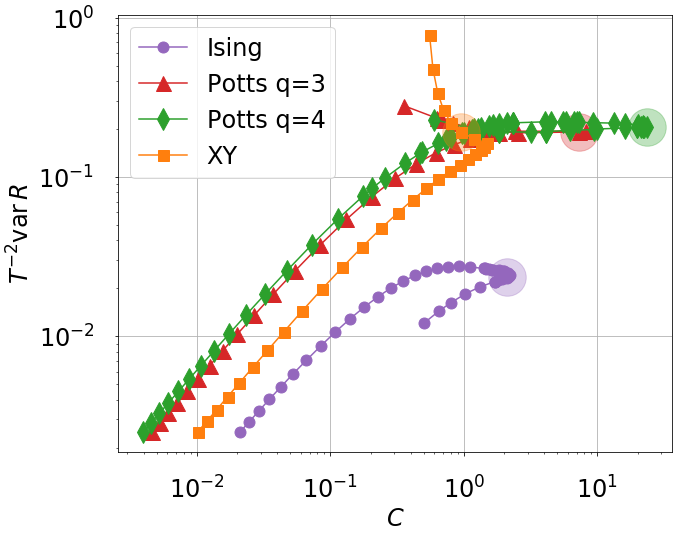

In [9]:
fig, ax = plt.subplots(figsize=(10,8))
ms = 15
ms2 = 11 

filename = 'heatbath T, E, C, R disp std L = {0} sweeps term.csv'.format(L)
arr = np.loadtxt(path+filename)
arr = arr[np.argsort(arr[:,0])][3:]
ax.loglog(arr[:,2]/L**2*arr[:,0]**0, arr[:,3]*(1-arr[:,3])/arr[:,0]**2,  'o-', label='Ising', color=colours[512], ms=ms2)

crit = np.argwhere(abs(arr[:,0] - t_crit)<1e-4)[0][0]
ax.loglog((arr[crit,2]/L**2*arr[crit, 0]**0), (arr[crit,3]*(1-arr[crit, 3])/arr[crit, 0]**2), '.',ms=75, alpha=0.3, color=colours[512])     

filename = 'potts 3 heatbath T, E, C, R disp std L={0} sweeps term.csv'.format(L)
arr = np.loadtxt(path+filename)
arr = arr[np.argsort(arr[:,0])]
ax.loglog((arr[1:,2]/L**2*arr[1:,0]**0), (arr[1:,3]*(1-arr[1:,3])/arr[1:,0]**2),  '^-', label='Potts q=3', color=colours[256], ms=ms)    
crit = np.argwhere(abs(arr[:,0] - t_crit_potts3)<1e-4)[0][0]
ax.loglog((arr[crit,2]/L**2*arr[crit, 0]**0), (arr[crit,3]*(1-arr[crit, 3])/arr[crit, 0]**2), '.',ms=75, alpha=0.3, color=colours[256])  

filename = 'potts 4 heatbath T, E, C, R disp std L={0} sweeps term.csv'.format(L)
arr = np.loadtxt(path+filename)
arr = arr[np.argsort(arr[:,0])]
ax.loglog((arr[1:,2]/L**2*arr[1:,0]**0),( arr[1:,3]*(1-arr[1:,3])/arr[1:,0]**2),  'd-', label='Potts q=4', color=colours[128], ms=ms)
crit = np.argwhere(abs(arr[:,0] - t_crit_potts4)<1e-4)[0][0]
ax.loglog((arr[crit,2]/L**2*arr[crit, 0]**0),( arr[crit,3]*(1-arr[crit, 3])/arr[crit, 0]**2), '.',ms=75, alpha=0.3, color=colours[128])  

filename = 'heatbath XY 2D T, E, C, R disp std L={0} sweeps term.csv'.format(L)
arr = np.loadtxt(path+filename)
arr = arr[np.argsort(arr[:,0])]
ax.loglog((arr[1:,2]/L**2*arr[1:,0]**0),( arr[1:,3]*(1-arr[1:,3])/arr[1:,0]**2),  's-', label='XY', color=colours[64], ms=ms2)
crit = np.argwhere(abs(arr[:,0] - t_crit_xy)<1e-4)[0][0]
ax.loglog((arr[crit,2]/L**2*arr[crit, 0]**0),( arr[crit,3]*(1-arr[crit, 3])/arr[crit, 0]**2), '.',ms=75, alpha=0.3, color=colours[64])   

ax.grid(True)
    
ax.legend(loc=0)    
ax.set_xlabel(r'$C$')
ax.set_ylabel(r'$T^{-2} \mathrm{var}\,{R}$')

fig.tight_layout()
fig.savefig(path_pics + 'All2HB-CR-loglog.png', dpi=300)


# Second moments of energy and acceptance ratio for two-dimensional models: the Ising model (circles), the Potts model with q = 3 (triangles) and q = 4 (diamonds) and the XY model (squares).
## Metropolis updates
Symbols are simulation results with erorrbars, lines are to guide an eye. Simulations were done with $64^2$ spins with periodic boundary conditions in both directions. See text for discussion.

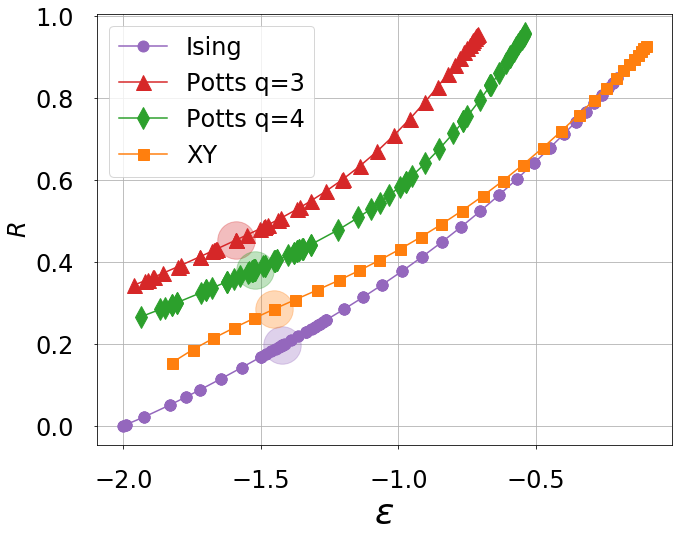

In [10]:
fig, ax = plt.subplots(figsize=(10,8))
ms = 15
ms2 = 11

filename = 'metropolis T, E, C, R disp std L = {0} sweeps term.csv'.format(L)
arr = np.loadtxt(path+filename)
arr = arr[np.argsort(arr[:,0])]
ax.errorbar(arr[1:,1], arr[1:,3],  fmt='o-', label='Ising', color=colours[512], ms=ms2)
crit = np.argwhere(abs(arr[:,0] - t_crit)<1e-4)[0][0]
ax.plot(arr[crit,1], arr[crit,3], '.',ms=75, alpha=0.3, color=colours[512])  

filename = 'potts 3 metropolis T, E, C, R disp std L={0} sweeps term.csv'.format(L)
arr = np.loadtxt(path+filename)
arr = arr[np.argsort(arr[:,0])]
ax.errorbar(arr[1:,1], arr[1:,3],  fmt='^-', label='Potts q=3', color=colours[256], ms=ms)   
crit = np.argwhere(abs(arr[:,0] - t_crit_potts3)<1e-4)[0][0]
ax.plot(arr[crit,1], arr[crit,3], '.',ms=75, alpha=0.3, color=colours[256])  


filename = 'potts 4 metropolis T, E, C, R disp std L={0} sweeps term.csv'.format(L)
arr = np.loadtxt(path+filename)
arr = arr[np.argsort(arr[:,0])]
ax.errorbar(arr[1:,1], arr[1:,3],  fmt='d-', label='Potts q=4', color=colours[128], ms=ms)
crit = np.argwhere(abs(arr[:,0] - t_crit_potts4)<1e-4)[0][0]
ax.plot(arr[crit,1], arr[crit,3], '.',ms=75, alpha=0.3, color=colours[128])      

filename = 'metropolis XY 2D T, E, C, R disp std L={0} sweeps term.csv'.format(L)
arr = np.loadtxt(path+filename)
arr = arr[np.argsort(arr[:,0])]
ax.errorbar(arr[1:,1], arr[1:,3],  fmt='s-', label='XY', color=colours[64], ms=ms2)
crit = np.argwhere(abs(arr[:,0] - t_crit_xy)<1e-4)[0][0]
ax.plot(arr[crit,1], arr[crit,3], '.',ms=75, alpha=0.3, color=colours[64])  

ax.grid(True)
ax.legend(loc=0)    
ax.set_xlabel(r'$\varepsilon$', fontsize=36)
ax.set_ylabel(r'$R$', fontsize=24)

fig.tight_layout()
fig.savefig(path_pics + 'All2M-ER.png', dpi=300)


# Second moments of energy and acceptance ratio for two-dimensional models: the Ising model (circles), the Potts model with q = 3 (triangles) and q = 4 (diamonds) and the XY model (squares).
## Heat bath updates
Symbols are simulation results with erorrbars, lines are to guide an eye. Simulations were done with $64^2$ spins with periodic boundary conditions in both directions. See text for discussion.

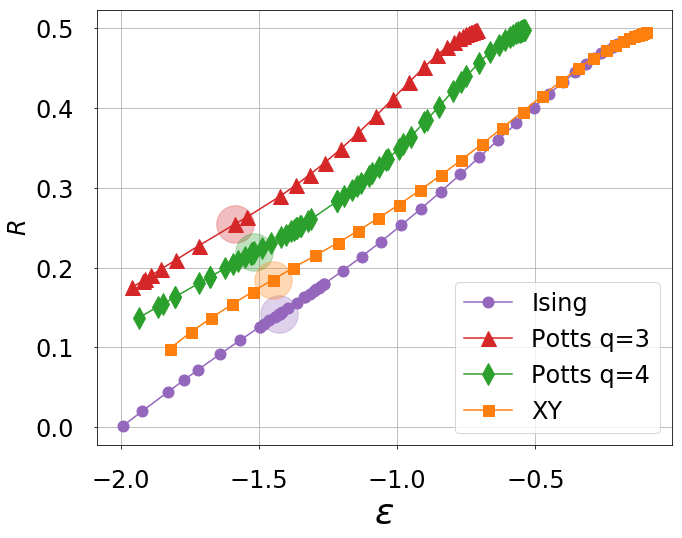

In [11]:
fig, ax = plt.subplots(figsize=(10,8))
ms = 15
ms2 = 11

filename = 'heatbath T, E, C, R disp std L = {0} sweeps term.csv'.format(L)
arr = np.loadtxt(path+filename)
arr = arr[np.argsort(arr[:,0])]
ax.errorbar(arr[1:,1], arr[1:,3],  fmt='o-', label='Ising', color=colours[512], ms=ms2)
crit = np.argwhere(abs(arr[:,0] - t_crit)<1e-4)[0][0]
ax.plot(arr[crit,1], arr[crit,3], '.',ms=75, alpha=0.3, color=colours[512])  

filename = 'potts 3 heatbath T, E, C, R disp std L={0} sweeps term.csv'.format(L)
arr = np.loadtxt(path+filename)
arr = arr[np.argsort(arr[:,0])]
ax.errorbar(arr[1:,1], arr[1:,3],  fmt='^-', label='Potts q=3', color=colours[256], ms=ms)   
crit = np.argwhere(abs(arr[:,0] - t_crit_potts3)<1e-4)[0][0]
ax.plot(arr[crit,1], arr[crit,3], '.',ms=75, alpha=0.3, color=colours[256])  


filename = 'potts 4 heatbath T, E, C, R disp std L={0} sweeps term.csv'.format(L)
arr = np.loadtxt(path+filename)
arr = arr[np.argsort(arr[:,0])]
ax.errorbar(arr[1:,1], arr[1:,3],  fmt='d-', label='Potts q=4', color=colours[128], ms=ms)
crit = np.argwhere(abs(arr[:,0] - t_crit_potts4)<1e-4)[0][0]
ax.plot(arr[crit,1], arr[crit,3], '.',ms=75, alpha=0.3, color=colours[128])      

filename = 'heatbath XY 2D T, E, C, R disp std L={0} sweeps term.csv'.format(L)
arr = np.loadtxt(path+filename)
arr = arr[np.argsort(arr[:,0])]
ax.errorbar(arr[1:,1], arr[1:,3],  fmt='s-', label='XY', color=colours[64], ms=ms2)
crit = np.argwhere(abs(arr[:,0] - t_crit_xy)<1e-4)[0][0]
ax.plot(arr[crit,1], arr[crit,3], '.',ms=75, alpha=0.3, color=colours[64])  

ax.grid(True)
ax.legend(loc=0)    
ax.set_xlabel(r'$\varepsilon$', fontsize=36)
ax.set_ylabel(r'$R$', fontsize=24)

fig.tight_layout()
fig.savefig(path_pics + 'All2HB-ER.png', dpi=300)
